In [1]:
import tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
f50 = np.load("f50.npy")
f100 = np.load("f100.npy")
f150 = np.load("f150.npy")
f200 = np.load("f200.npy")
f50_100 = np.load("f50_100.npy")

In [3]:
f50_100_target = []
for i in range(100):
    zero_um = (0,1)
    f50_100_target.append(zero_um)

for i in range(100):
    um_zero = (1,0)
    f50_100_target.append(um_zero)

In [4]:
# f50_100_target

In [5]:
X = np.reshape(f50_100, (200, 1000, 1))
y = np.array(f50_100_target)

In [6]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [7]:
import math
n_input_layer = 1000
n_output_layer = 1
n_hidden_layer = round(math.sqrt((n_input_layer*n_output_layer)))
print("nro de neurônios na hidden layer:", n_hidden_layer)

nro de neurônios na hidden layer: 32


In [8]:
model=Sequential()
model.add(SimpleRNN(n_hidden_layer, 
                    input_shape=(1000,1), 
                    kernel_initializer='random_normal'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss = 'mse', optimizer = 'rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 1,154
Trainable params: 1,154
Non-trainable params: 0
_________________________________________________________________


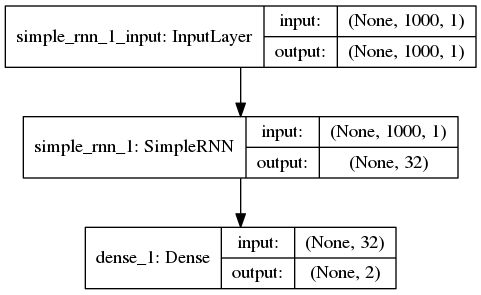

In [9]:
from keras.utils.vis_utils import plot_model
import graphviz
from interface import implements, Interface
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
model.fit(X, y, epochs = 200, batch_size = 32)

Epoch 1/200
200/200 [==============================] - 1s 7ms/step - loss: 0.2556
Epoch 2/200
200/200 [==============================] - 1s 6ms/step - loss: 0.2287
Epoch 3/200
200/200 [==============================] - 1s 6ms/step - loss: 0.1537
Epoch 4/200
200/200 [==============================] - 1s 6ms/step - loss: 0.1306
Epoch 5/200
200/200 [==============================] - 1s 6ms/step - loss: 0.0764
Epoch 6/200
200/200 [==============================] - 1s 6ms/step - loss: 0.0489
Epoch 7/200
200/200 [==============================] - 1s 6ms/step - loss: 0.0358
Epoch 8/200
200/200 [==============================] - 1s 6ms/step - loss: 0.0256
Epoch 9/200
200/200 [==============================] - 1s 6ms/step - loss: 0.0168
Epoch 10/200
200/200 [==============================] - 1s 6ms/step - loss: 0.0118
Epoch 11/200
200/200 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 12/200
200/200 [==============================] - 1s 6ms/step - loss: 0.0060
Epoch 13/200


200/200 [==============================] - 1s 5ms/step - loss: 2.8124e-08
Epoch 97/200
200/200 [==============================] - 1s 5ms/step - loss: 2.8019e-08
Epoch 98/200
200/200 [==============================] - 1s 5ms/step - loss: 2.7877e-08
Epoch 99/200
200/200 [==============================] - 1s 5ms/step - loss: 2.7673e-08
Epoch 100/200
200/200 [==============================] - 1s 5ms/step - loss: 2.7394e-08
Epoch 101/200
200/200 [==============================] - 1s 5ms/step - loss: 2.7032e-08
Epoch 102/200
200/200 [==============================] - 1s 5ms/step - loss: 2.6557e-08
Epoch 103/200
200/200 [==============================] - 1s 5ms/step - loss: 2.5945e-08
Epoch 104/200
200/200 [==============================] - 1s 5ms/step - loss: 2.5219e-08
Epoch 105/200
200/200 [==============================] - 1s 5ms/step - loss: 2.4332e-08
Epoch 106/200
200/200 [==============================] - 1s 5ms/step - loss: 2.3311e-08
Epoch 107/200
200/200 [==========================

200/200 [==============================] - 1s 5ms/step - loss: 3.8052e-09
Epoch 190/200
200/200 [==============================] - 1s 5ms/step - loss: 3.7607e-09
Epoch 191/200
200/200 [==============================] - 1s 5ms/step - loss: 3.7169e-09
Epoch 192/200
200/200 [==============================] - 1s 5ms/step - loss: 3.6735e-09
Epoch 193/200
200/200 [==============================] - 1s 5ms/step - loss: 3.6290e-09
Epoch 194/200
200/200 [==============================] - 1s 5ms/step - loss: 3.5843e-09
Epoch 195/200
200/200 [==============================] - 1s 6ms/step - loss: 3.5385e-09
Epoch 196/200
200/200 [==============================] - 1s 6ms/step - loss: 3.4899e-09
Epoch 197/200
200/200 [==============================] - 1s 5ms/step - loss: 3.4392e-09
Epoch 198/200
200/200 [==============================] - 1s 5ms/step - loss: 3.3840e-09
Epoch 199/200
200/200 [==============================] - 1s 5ms/step - loss: 3.3235e-09
Epoch 200/200
200/200 [=======================

In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
pi = 3.1415
N = 1000
t = np.arange(0,N)
f = 100

In [13]:
qtd_amostras = 20
test = []
test_target = []

f = 50
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1)) 
    test_target.append(zero_um)
    test.append(x)
    
f = 100
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1))    
    test_target.append(um_zero)
    test.append(x)
    
test = np.reshape(test, (40, 1000, 1))

In [14]:
predictions = model.predict(test)
for i in range(len(test)):
    print(predictions[i], 'expected', test_target[i])

[5.5911525e-05 9.9994195e-01] expected (0, 1)
[6.1858605e-05 9.9992979e-01] expected (0, 1)
[6.8233188e-05 9.9991596e-01] expected (0, 1)
[6.5002874e-05 9.9992311e-01] expected (0, 1)
[5.606235e-05 9.999416e-01] expected (0, 1)
[6.5132364e-05 9.9992287e-01] expected (0, 1)
[5.377606e-05 9.999461e-01] expected (0, 1)
[5.9654463e-05 9.9993432e-01] expected (0, 1)
[6.583161e-05 9.999213e-01] expected (0, 1)
[5.2754098e-05 9.9994802e-01] expected (0, 1)
[5.3962536e-05 9.9994576e-01] expected (0, 1)
[5.1575822e-05 9.9995017e-01] expected (0, 1)
[5.3485768e-05 9.9994659e-01] expected (0, 1)
[6.0104536e-05 9.9993348e-01] expected (0, 1)
[5.6995515e-05 9.9993980e-01] expected (0, 1)
[4.9879363e-05 9.9995339e-01] expected (0, 1)
[5.1186333e-05 9.9995100e-01] expected (0, 1)
[4.8668753e-05 9.9995553e-01] expected (0, 1)
[6.653507e-05 9.999198e-01] expected (0, 1)
[5.1332885e-05 9.9995065e-01] expected (0, 1)
[9.999416e-01 6.326538e-05] expected (1, 0)
[9.999399e-01 6.660090e-05] expected (1, 0)
